<a href="https://colab.research.google.com/github/Rabia-Akhtr/Applied-Data-Science-1/blob/main/hackathon__4_(2nd_Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Data Science Challenge 2025 — Group 1**
### *Module:* 7PAM2015 — Research Methods  
### *Instructor:*   Dr Pedro Carrilho  
### *Date:* 22 October 2025  

---

##  **Team Name:** **XAI Explorers**  
###  *Explaining intelligence through data and collaboration*  




# **👥 Team Members**
- **Riffat Munaf** — 22076284  
- **Eman Abdul Wahid** — 23013083  
- **Rabia Akhtar** — 23031641  
- **Hamza Tariq** — 23010525  
- **Anandhu Shaji** — 23006426  
- **Umar Sattar** — 23035824  
- **Arsalan Saleem** — 23034246  
- **Burhan Muhammad** — 22033349  
- **Naqash Razzaq** — 23033626  


###  **GitHub Repository**
🔗 [Data-Science-Challenge-Hackathon](https://github.com/DataScience-Challenge-Group1/Data-Science-Challenge-Hackathon)


# **1.  Project Overview**
This notebook documents the full workflow for our Data Science Challenge hackathon:
- Perform data exploration (EDA)
- Pre-process features
- Build and tune multiple models
- Evaluate performance with relevant metrics
- Apply Explainable AI (XAI) techniques
- Submit top-5 model results


# **2. Setup and Imports**

In [ ]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing




In [ ]:
# Mount your GoogleDrive (only need to do once)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Data Loading**

In [ ]:
# Load the data
df_train = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset_A_training.csv")
df_test  = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset_A_testing.csv")

# Quick sanity checks
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Train columns:", list(df_train.columns)[:12], "...")

Train shape: (4756, 31)
Test shape: (4749, 30)
Train columns: ['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition'] ...


In [ ]:
# Cell 2 — Domain knowledge & non-graphical analysis (head/info/describe, balance, missing)

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

assert TARGET in df_train.columns
assert ID_COL in df_train.columns and ID_COL in df_test.columns

print("== Train.head(10) ==")
display(df_train.head(10))

print("\n== Train.info() ==")
df_train.info()

print("\n== Numeric describe (train) ==")
display(df_train.select_dtypes(include=["number"]).describe().T)

print("\n== Categorical describe (train) ==")
display(df_train.select_dtypes(exclude=["number"]).describe().T)

print("\n== Target distribution (train) ==")
tgt_counts = df_train[TARGET].value_counts(dropna=False).sort_index()
tgt_ratio  = (tgt_counts / len(df_train)).rename("ratio")
display(pd.concat([tgt_counts.rename("count"), tgt_ratio], axis=1))

print("\n== Missing values (train) — top 15 ==")
miss_train = df_train.isna().sum().sort_values(ascending=False)
display(miss_train[miss_train > 0].head(15))

print("\n== Missing values (test) — top 15 ==")
miss_test = df_test.isna().sum().sort_values(ascending=False)
display(miss_test[miss_test > 0].head(15))


== Train.head(10) ==


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,entertainment,0
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,real_estate,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,NaN,0
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,utilities,1
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",2.0,0.0,NaN,0
5,6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Rent,Employed,Non-MSA,2.0,2.0,administrative,0
6,7,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,0.0,technology,1
7,8,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",NaN,NaN,NaN,0
8,9,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",3.0,0.0,NaN,1
9,10,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,NaN,0



== Train.info() ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                4756 non-null   int64  
 1   flu_concern                  4744 non-null   float64
 2   flu_knowledge                4733 non-null   float64
 3   behavioral_antiviral_meds    4742 non-null   float64
 4   behavioral_avoidance         4724 non-null   float64
 5   behavioral_face_mask         4753 non-null   float64
 6   behavioral_wash_hands        4748 non-null   float64
 7   behavioral_large_gatherings  4747 non-null   float64
 8   behavioral_outside_home      4747 non-null   float64
 9   behavioral_touch_face        4737 non-null   float64
 10  doctor_recc_seasonal         4435 non-null   float64
 11  chronic_med_condition        4568 non-null   float64
 12  child_under_6_months         4604 non-null   float64
 13

,count,mean,std,min,25%,50%,75%,max
respondent_id,4756.0,2378.500000,1373.083270,1.0,1189.75,2378.5,3567.25,4756.0
flu_concern,4744.0,1.643128,0.919810,0.0,1.00,2.0,2.00,3.0
flu_knowledge,4733.0,1.293049,0.618902,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,4742.0,0.052299,0.222652,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,4724.0,0.734124,0.441846,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,4753.0,0.073848,0.261551,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,4748.0,0.836563,0.369803,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,4747.0,0.365494,0.481619,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,4747.0,0.336634,0.472608,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,4737.0,0.688410,0.463192,0.0,0.00,1.0,1.00,1.0



== Categorical describe (train) ==


,count,unique,top,freq
age_group,4756,5,65+ Years,1169
education,4486,4,College Graduate,1879
race,4756,4,White,3766
sex,4756,2,Female,2783
income_poverty,3966,3,"<= $75,000, Above Poverty",2258
marital_status,4491,2,Married,2403
rent_or_own,4375,2,Own,3292
employment_status,4487,3,Employed,2467
census_msa,4756,3,"MSA, Not Principle City",2059
employment_sector,2442,21,media,511



== Target distribution (train) ==


,count,ratio
seasonal_vaccine,,
0,2205,0.463625
1,2551,0.536375



== Missing values (train) — top 15 ==


,0
employment_sector,2314
health_insurance,1925
income_poverty,790
rent_or_own,381
doctor_recc_seasonal,321
education,270
employment_status,269
marital_status,265
chronic_med_condition,188
child_under_6_months,152



== Missing values (test) — top 15 ==


,0
employment_sector,2405
health_insurance,1982
income_poverty,797
rent_or_own,379
doctor_recc_seasonal,345
employment_status,277
education,269
marital_status,269
chronic_med_condition,168
child_under_6_months,155


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

Numeric columns: 19
Categorical columns: 10


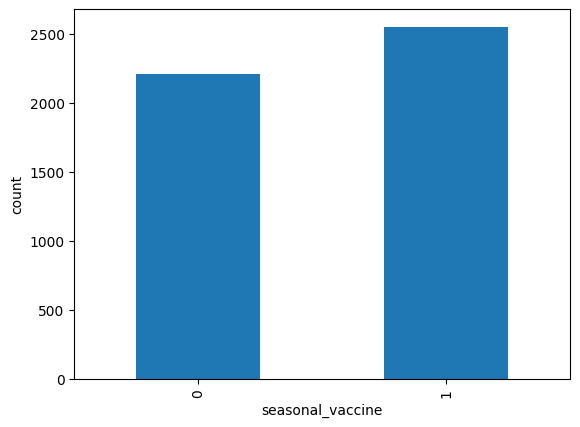

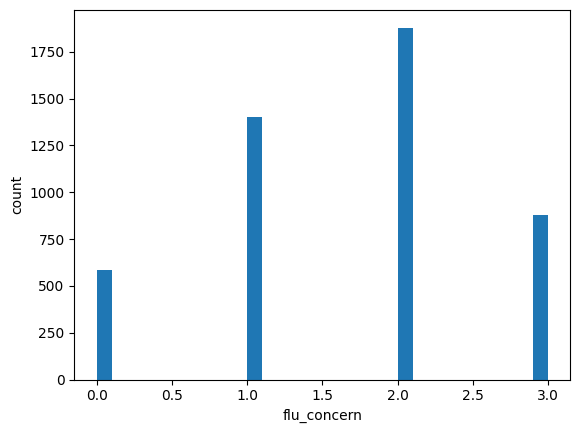

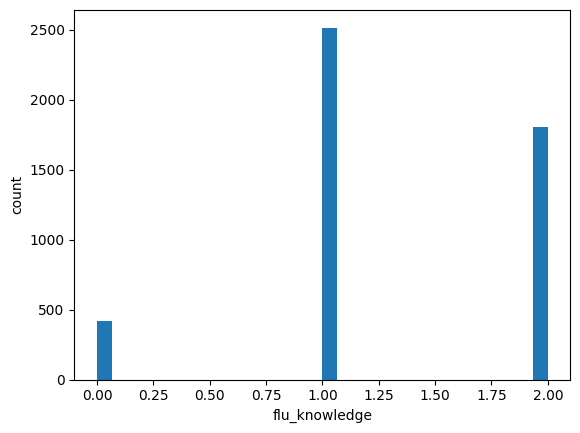

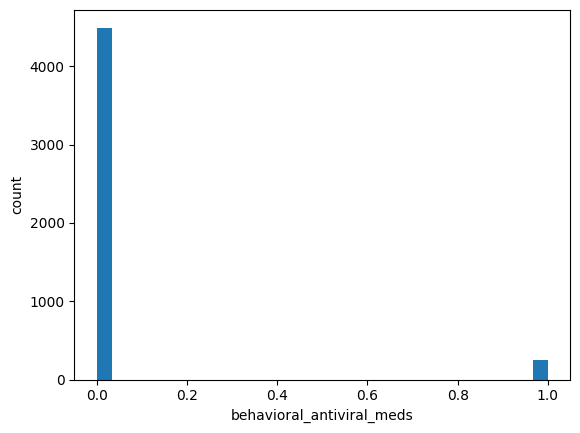

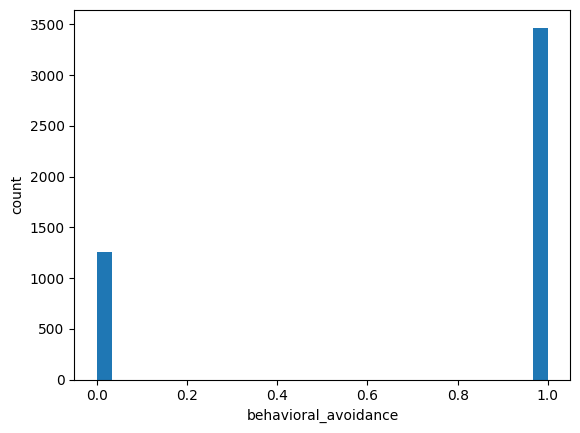

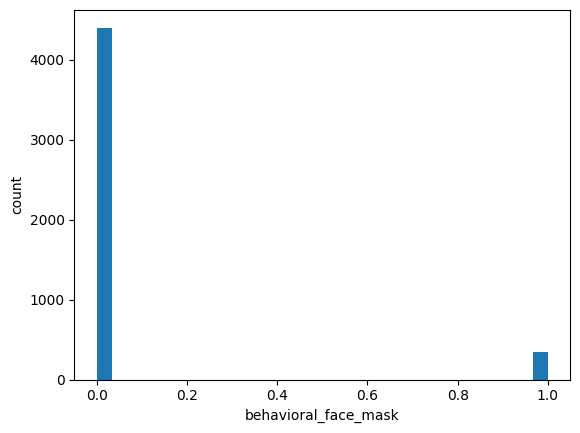

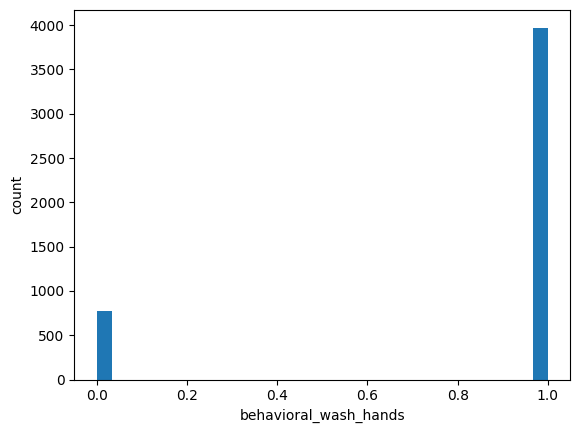

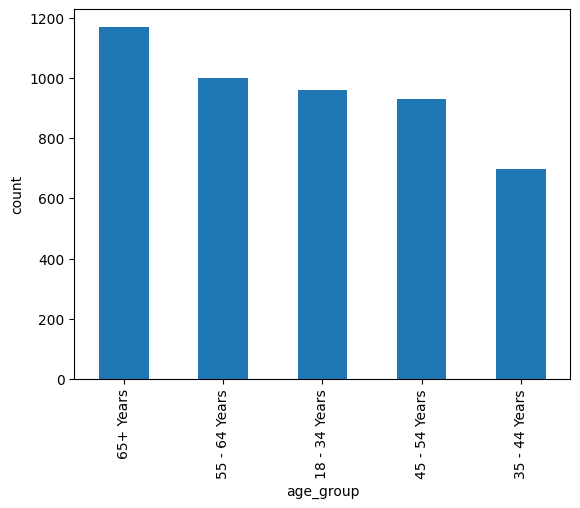

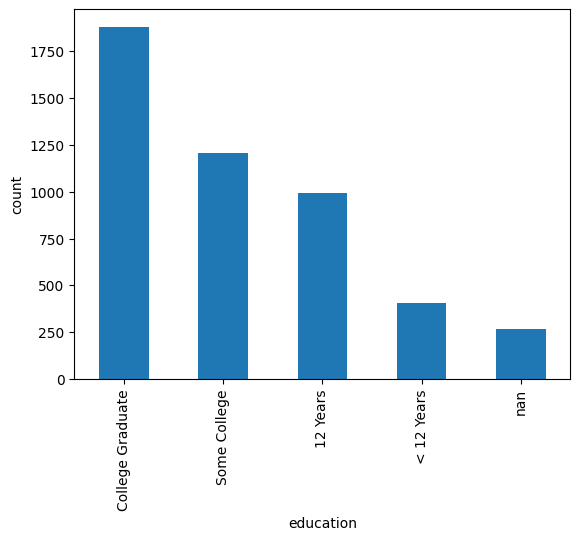

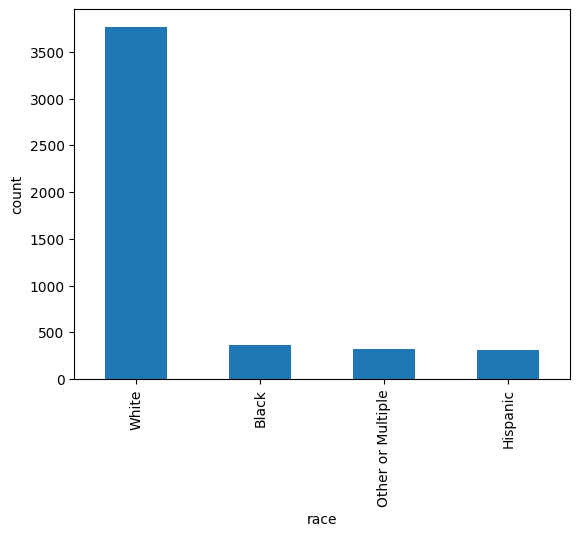

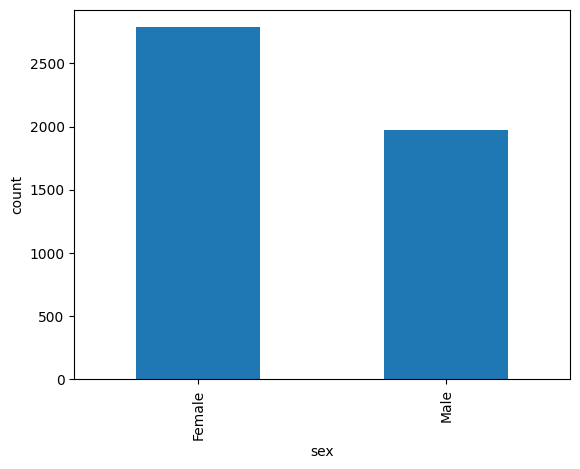

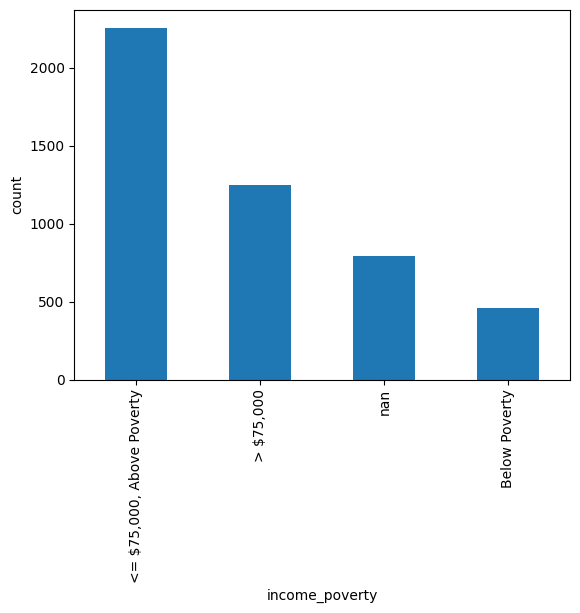

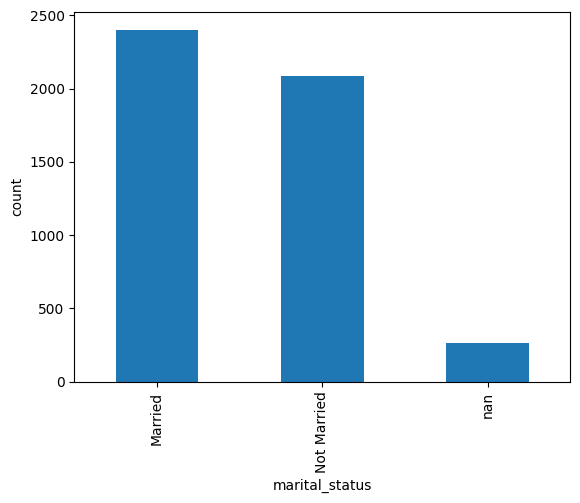


Target rate by age_group (row-normalized):


seasonal_vaccine,0,1
age_group,,
18 - 34 Years,0.651042,0.348958
35 - 44 Years,0.573888,0.426112
45 - 54 Years,0.502685,0.497315
55 - 64 Years,0.391391,0.608609
65+ Years,0.274594,0.725406



Target rate by education (row-normalized):


seasonal_vaccine,0,1
education,,
12 Years,0.488911,0.511089
< 12 Years,0.551724,0.448276
College Graduate,0.402342,0.597658
Some College,0.481390,0.518610



Target rate by race (row-normalized):


seasonal_vaccine,0,1
race,,
Black,0.618785,0.381215
Hispanic,0.630225,0.369775
Other or Multiple,0.514196,0.485804
White,0.430696,0.569304


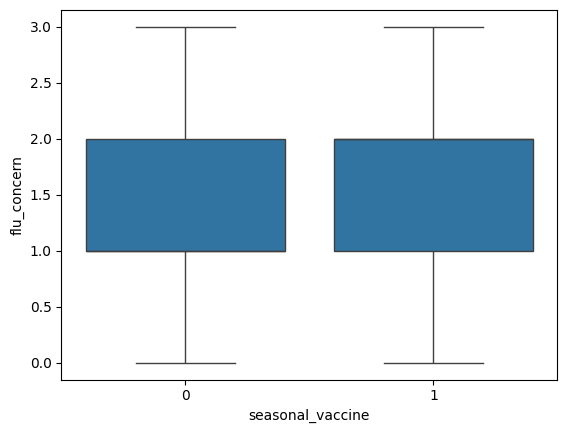

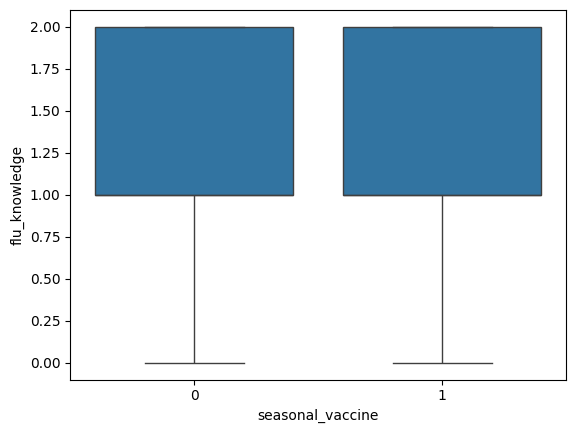

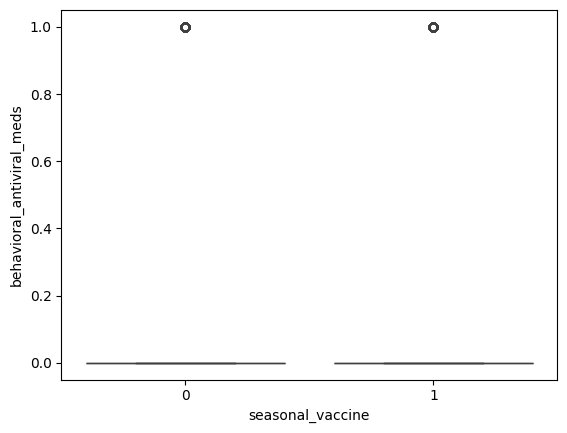

In [ ]:
# Cell 3 — Basic EDA plots (simple)

# identify columns
num_cols = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_train.columns if c not in num_cols + [TARGET, ID_COL]]

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

# 1) target distribution
df_train[TARGET].value_counts().sort_index().plot(kind="bar")
plt.xlabel(TARGET); plt.ylabel("count")
plt.show()

# 2) numeric histograms (up to 6)
for col in num_cols[:6]:
    df_train[col].dropna().plot(kind="hist", bins=30)
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# 3) categorical bars (up to 6; top 10 levels)
for col in cat_cols[:6]:
    df_train[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# 4) simple target vs categorical (up to 3)
for col in cat_cols[:3]:
    ct = pd.crosstab(df_train[col], df_train[TARGET], normalize="index")
    print(f"\nTarget rate by {col} (row-normalized):")
    display(ct.head(10))

# 5) numeric vs target (up to 3)
for col in num_cols[:3]:
    sns.boxplot(x=df_train[TARGET], y=df_train[col])
    plt.xlabel(TARGET); plt.ylabel(col)
    plt.show()


# **5. Data Pre-processing**

In [ ]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*k=.*greater than n_features.*",
    category=UserWarning,
    module="sklearn.feature_selection._univariate_selection",
)


In [ ]:
import os, random, numpy as np
random.seed(42)
np.random.seed(42)


In [ ]:
# Cell — Upgrades for better results (CV rank + save top-5)

import os, numpy as np, pandas as pd
from datetime import datetime

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier

# === Data ===
TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"
X_full = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").copy()
y_full = df_train[TARGET].copy()
X_test = df_test.drop(columns=[ID_COL], errors="ignore").copy()

num_cols = X_full.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_full.columns if c not in num_cols]

# === Preprocessors ===
# A) Simple impute + rare-bucket OHE
pre_simple = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
        # min_frequency buckets rare categories automatically
        ("ohe", OneHotEncoder(handle_unknown="ignore", min_frequency=20))
    ]), cat_cols),
])

# B) KNN impute for numeric (with scaling inside the numeric branch) + rare-bucket OHE
pre_knn = ColumnTransformer([
    ("num", Pipeline([
        ("imp", KNNImputer(n_neighbors=5, weights="uniform")),
        ("scl", StandardScaler(with_mean=False))  # safe for sparse downstream
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", min_frequency=20))
    ]), cat_cols),
])

def rf_selector(k="all"):
    from sklearn.feature_selection import SelectKBest, mutual_info_classif
    return SelectKBest(score_func=mutual_info_classif, k=k)

# === Base models (strong, fast) ===
lr = LogisticRegression(solver="liblinear", C=0.5, class_weight="balanced", max_iter=1000, random_state=42)

rf_base = dict(
    n_estimators=1000,
    max_depth=None,
    max_features="sqrt",
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)

rf_heavy = RandomForestClassifier(**rf_base)
rf_bal   = RandomForestClassifier(class_weight="balanced_subsample", **rf_base)

xgb_base = dict(
    subsample=0.9, colsample_bytree=0.9,
    eval_metric="logloss", tree_method="hist", random_state=42
)

xgb_tuned1 = XGBClassifier(n_estimators=600, max_depth=3, learning_rate=0.06, reg_alpha=0.5, gamma=0.0, **xgb_base)
xgb_tuned2 = XGBClassifier(n_estimators=900, max_depth=4, learning_rate=0.05, reg_alpha=0.0, gamma=0.5, **xgb_base)

# Calibrators (better probability ranking)
def calibrate(est):
    return CalibratedClassifierCV(est, method="isotonic", cv=5)

# === Candidates (distinct techniques) ===
candidates = [
    # 1) XGB with simple impute + OHE
    ("A_XGB_simple", Pipeline([("pre", pre_simple), ("sel", rf_selector(100)), ("clf", xgb_tuned1)])),
    # 2) XGB with KNN impute (+scale) + OHE
    ("B_XGB_knn", Pipeline([("pre", pre_knn), ("sel", rf_selector(100)), ("clf", xgb_tuned2)])),
    # 3) RandomForest strong with simple impute
    ("C_RF_simple", Pipeline([("pre", pre_simple), ("sel", rf_selector(120)), ("clf", rf_heavy)])),
    # 4) RandomForest balanced + KNN impute
    ("D_RF_knn_bal", Pipeline([("pre", pre_knn), ("sel", rf_selector(120)), ("clf", rf_bal)])),
    # 5) Stacking: RF + XGB → LR meta (pre = KNN)
    ("E_Stack_RF_XGB", Pipeline([
        ("pre", pre_knn),
        ("sel", rf_selector(120)),
        ("stk", StackingClassifier(
            estimators=[("rf", rf_heavy), ("xgb", xgb_tuned1)],
            final_estimator=LogisticRegression(solver="liblinear", C=1.0, class_weight="balanced", max_iter=1000, random_state=42),
            stack_method="predict_proba", n_jobs=-1
        ))
    ])),
    # 6) Soft Voting (calibrated): LR + RF + XGB (pre = simple)
    ("F_Vote_LR_RF_XGB", Pipeline([
        ("pre", pre_simple),
        ("sel", rf_selector(120)),
        ("clf", VotingClassifier(
            estimators=[
                ("lr", calibrate(lr)),
                ("rf", calibrate(rf_heavy)),
                ("xgb", calibrate(xgb_tuned1)),
            ],
            voting="soft", n_jobs=-1
        ))
    ])),
]

# === CV rank by ROC-AUC ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for name, pipe in candidates:
    auc = cross_val_score(pipe, X_full, y_full, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
    scores.append((name, float(auc)))
scores.sort(key=lambda x: x[1], reverse=True)

print("CV leaderboard (ROC-AUC):")
for i, (name, auc) in enumerate(scores, 1):
    print(f"{i}. {name}: {auc:.4f}")

# === Save top-5 submissions (fit on full train) ===
OUT_DIR = "/content/drive/MyDrive/Hackathon/datasetA_submissions"
os.makedirs(OUT_DIR, exist_ok=True)
ex_path = "/content/drive/MyDrive/Hackathon/dataset_A_example_submission.csv"
if os.path.exists(ex_path):
    ex = pd.read_csv(ex_path); id_col_name, pred_col_name = ex.columns.tolist()
else:
    id_col_name, pred_col_name = ID_COL, TARGET

ts = datetime.now().strftime("%Y%m%d_%H%M%S")
top5 = scores[:5]
for rank, (name, _) in enumerate(top5, 1):
    pipe = dict(candidates)[name]
    pipe.fit(X_full, y_full)
    proba = pipe.predict_proba(X_test)[:, 1]
    sub = pd.DataFrame({id_col_name: df_test[ID_COL].values, pred_col_name: proba})
    sub_path = os.path.join(OUT_DIR, f"{rank:02d}_{name}_{ts}.csv")
    sub.to_csv(sub_path, index=False)
    print(f"Saved: {sub_path}")

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_metrics(pipe, X, y):
    aucs, f1s = [], []
    for train_idx, val_idx in cv.split(X, y):
        X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]
        pipe.fit(X_tr, y_tr)
        y_proba = pipe.predict_proba(X_va)[:, 1]
        y_pred  = (y_proba >= 0.5).astype(int)
        aucs.append(roc_auc_score(y_va, y_proba))
        f1s.append(f1_score(y_va, y_pred))
    return np.mean(aucs), np.mean(f1s)

for name, pipe in candidates:
    auc_mean, f1_mean = cv_metrics(pipe, X_full, y_full)
    print(f"{name}: CV AUC={auc_mean:.4f}, CV F1={f1_mean:.4f}")


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CV leaderboard (ROC-AUC):
1. F_Vote_LR_RF_XGB: 0.8520
2. E_Stack_RF_XGB: 0.8506
3. A_XGB_simple: 0.8467
4. D_RF_knn_bal: 0.8461
5. C_RF_simple: 0.8436
6. B_XGB_knn: 0.8433
Saved: /content/drive/MyDrive/Hackathon/datasetA_submissions/01_F_Vote_LR_RF_XGB_20251027_203756.csv
Saved: /content/drive/MyDrive/Hackathon/datasetA_submissions/02_E_Stack_RF_XGB_20251027_203756.csv
Saved: /content/drive/MyDrive/Hackathon/datasetA_submissions/03_A_XGB_simple_20251027_203756.csv
Saved: /content/drive/MyDrive/Hackathon/datasetA_submissions/04_D_RF_knn_bal_20251027_203756.csv
Saved: /content/drive/MyDrive/Hackathon/datasetA_submissions/05_C_RF_simple_20251027_203756.csv
A_XGB_simple: CV AUC=0.8467, CV F1=0.7904
B_XGB_knn: CV AUC=0.8433, CV F1=0.7859
C_RF_simple: CV AUC=0.8436, CV F1=0.7891
D_RF_knn_bal: CV AUC=0.8461, CV F1=0.7835
E_Stack_RF_XGB: CV AUC=0.8506, CV F1=0.7868
F_Vote_LR_RF_XGB: CV AUC=0.8520, CV F1=0.7961
